In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cereal.csv")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


(array([ 8.,  4., 14., 12.,  9.,  9., 12.,  9.]),
 array([-1.,  1.,  3.,  5.,  7.,  9., 11., 13., 15.]),
 <a list of 8 Patch objects>)

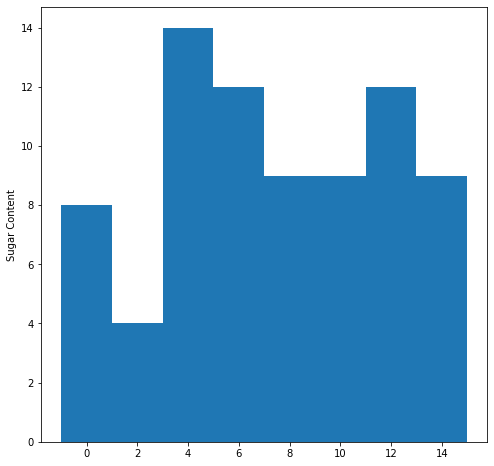

In [3]:
plt.figure(figsize=(8,8))
plt.ylabel('Sugar Content');
plt.hist(df.sugars,bins=8)

#Histogram Sugar content

(array([ 8., 63.,  0.,  6.]),
 array([  0.,  25.,  50.,  75., 100.]),
 <a list of 4 Patch objects>)

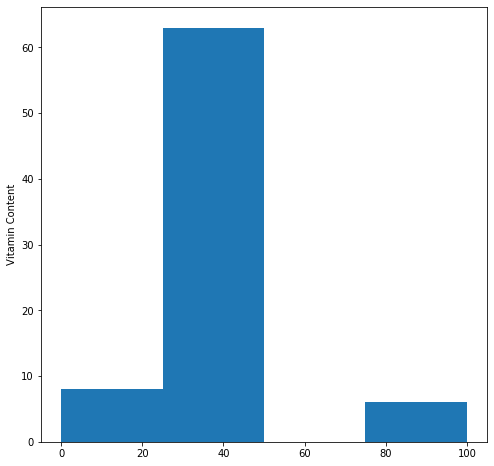

In [4]:
plt.figure(figsize=(8,8))
plt.ylabel('Vitamin Content');
plt.hist(df.vitamins,bins=4)
#Histogram Vitamins

In [5]:
#Question 2a. create a new column with their full name using the below mapping.
dict_cerealname = ({
    'N': 'Nabisco',
    'Q': 'Quaker Oats',
    'K': 'Kelloggs',
    'R': 'Raslston Purina',
    'G': 'General Mills' ,
    'P' :'Post' ,
    'A':'American Home Foods Products'
})
manufacturerfullname = []
clmn = list(df['mfr']) 
#print(clmn)
for i in clmn: 
    manufacturerfullname.append(dict_cerealname.get(i))
df['manufacturer'] = manufacturerfullname
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


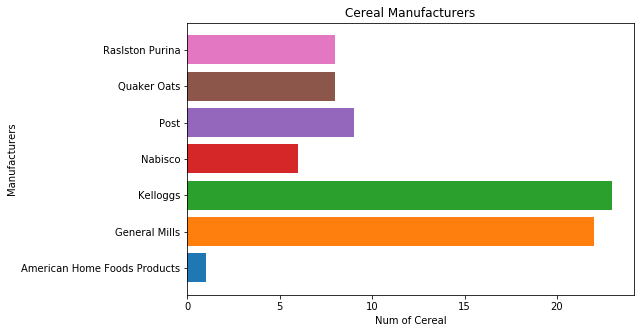

In [6]:
#Question 2b. Create a bar plot where each manufacturer is on 
#the y axis and the height of the bars depict the number of cereals manufactured by them. 
plt.figure(figsize=(8,5))
plt.title("Cereal Manufacturers")
plt.ylabel("Manufacturers")
plt.xlabel("Num of Cereal")
for group,data in df.groupby('manufacturer'):
    plt.barh(group, data['manufacturer'].count()) 


Question 3: Extract the rating as your target variable ‘y’ and all numerical parameters 
    as your predictors ‘x’. Separate 25% of your data as test set.

In [17]:
y = df.rating
df1 = df.drop(['name', 'mfr', 'type', 'manufacturer','rating'], axis=1)
df1
x = df1

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=5)
print('X_train_shape', x_train.shape)
print('X_test_shape', x_test.shape)

X_train_shape (57, 12)
X_test_shape (20, 12)


Question 4: Fit a linear regression module and measure the mean squared error on test dataset.

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train,y_train)
print('COEFFICIENT :', lr.coef_)
print('INTERCEPT :', lr.intercept_)
print('SCORE :', lr.score(x_test,y_test)) # Coeffecient of determination  R^2

COEFFICIENT : [-2.22724166e-01  3.27317387e+00 -1.69140801e+00 -5.44927023e-02
  3.44347976e+00  1.09245095e+00 -7.24895157e-01 -3.39933504e-02
 -5.12119698e-02  9.84742115e-09  2.83740456e-07  2.03959862e-07]
INTERCEPT : 54.92718381198523
SCORE : 0.999999999999999


In [29]:
pred = lr.predict(x_test)

In [30]:
from sklearn import metrics
print ("MSE", metrics.mean_squared_error(y_test,pred))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))

MSE 1.5012617947943056e-13
RMSE 3.8746119738553245e-07
